# Wine quality prediction

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
wine_df = pd.read_csv(r'C:\Users\NIMA\Downloads\winequality-red.csv')

# Display the first few rows of the DataFrame
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Cleaning

In [2]:


wine_df.columns = [col.replace(" ", "_") for col in wine_df.columns]
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
wine_df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
wine_df.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur_dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Looks like the data has no missing value, and our data is full of numeric features.

In [5]:
wine_df.duplicated().sum()

240

In [6]:
wine_df.drop_duplicates(inplace = True)
wine_df = wine_df.reset_index(drop=True)

Let's drop the duplicated 240 rows in the train set, Don't clear the duplicates in the test set,
your submission should be the same size of the competition wants.

In [7]:
target = [col for col in wine_df.columns if wine_df[col].nunique()<10]
target

['quality']

# Target

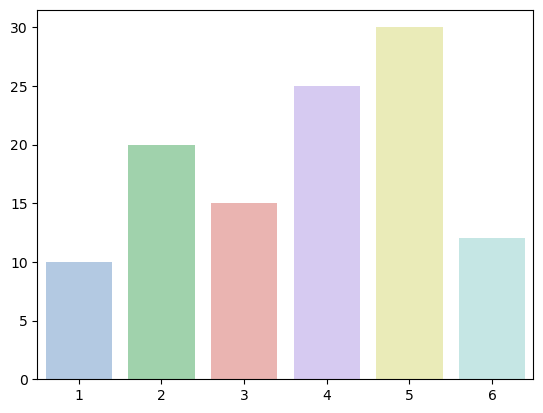

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of colors
colors = ["#abc9ea", "#98daa7", "#f3aba8", "#d3c3f7", "#f3f3af", "#c0ebe9"]

# Your plotting code here
# For example, a bar plot with specified colors
sns.barplot(x=[1, 2, 3, 4, 5, 6], y=[10, 20, 15, 25, 30, 12], palette=colors)

plt.show()


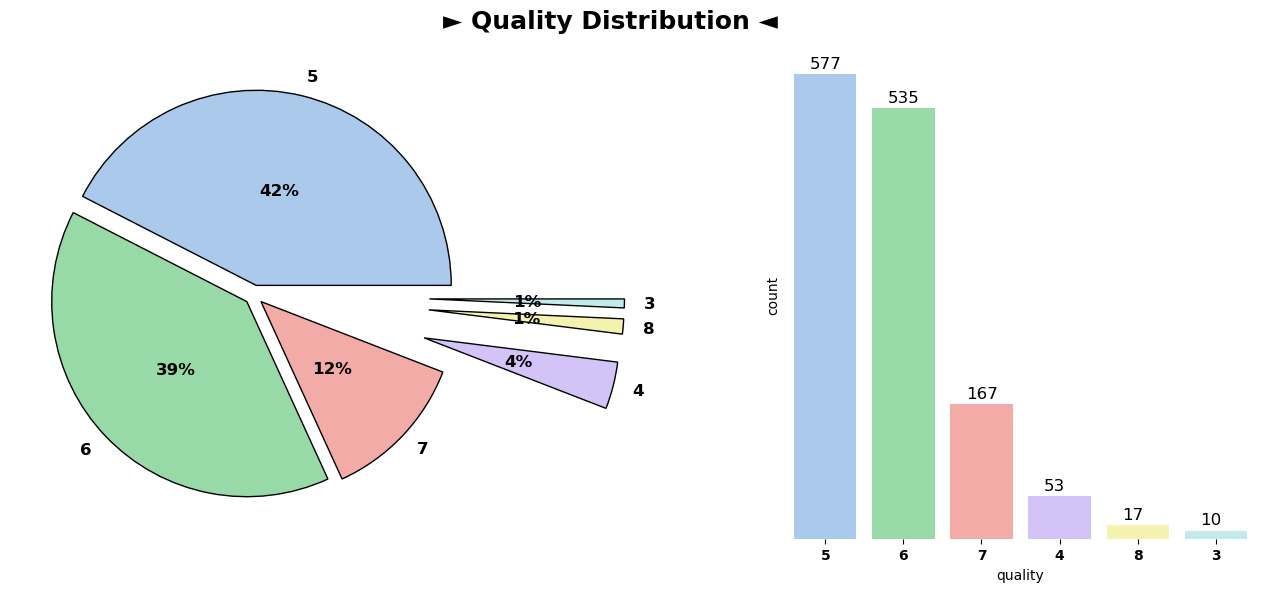

In [10]:
fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
ax[0].pie(wine_df["quality"].value_counts().to_list(),
        colors=["#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af","#c0ebe9"],
        labels=wine_df["quality"].value_counts().index.to_list(),
        autopct='%1.f%%', 
        explode=([.05]*3 +[.9,.9,.9]),
        pctdistance=0.5,
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
        textprops=textprops)

sns.countplot(x = "quality", data=wine_df, palette = "pastel6", order=wine_df["quality"].value_counts().to_dict().keys())
for p, count in enumerate(wine_df["quality"].value_counts().to_dict().values(),0):
    ax[1].text(p-0.2, count + 8, count, color='black', fontsize=12)
plt.setp(ax[1].get_xticklabels(), fontweight="bold")
plt.yticks([])
plt.box(False)
fig.suptitle(x=0.56, t=f'► Quality Distribution ◄', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

In [18]:
num_cols = [col for col in wine_df.columns if (wine_df[col].dtype in ["int64","float64"]) & (wine_df[col].nunique()>50)]
num_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

# Correlation

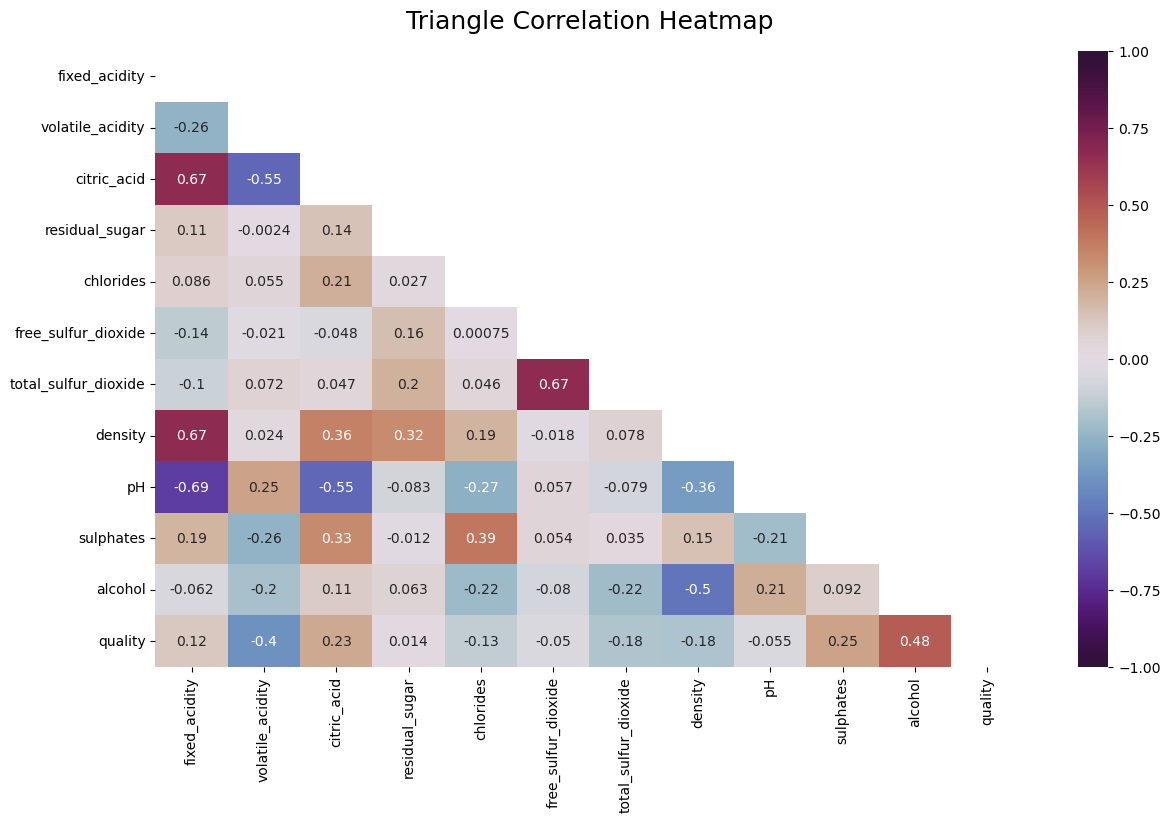

In [17]:
wine_df.corr()
plt.figure(figsize=(14,8))
mask = np.triu(np.ones_like(wine_df.corr()))
heatmap = sns.heatmap(wine_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='twilight_shifted')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

In [ ]:
Outlier deduction

In [19]:
wine_df["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [20]:
wine_df["Quality_Range"] = pd.cut(wine_df["quality"], 
                                 bins=[-np.inf, 4, 6, np.inf], 
                                 labels=["3-4","5-6","7-8"])

We created a new feature for visualization purposes.

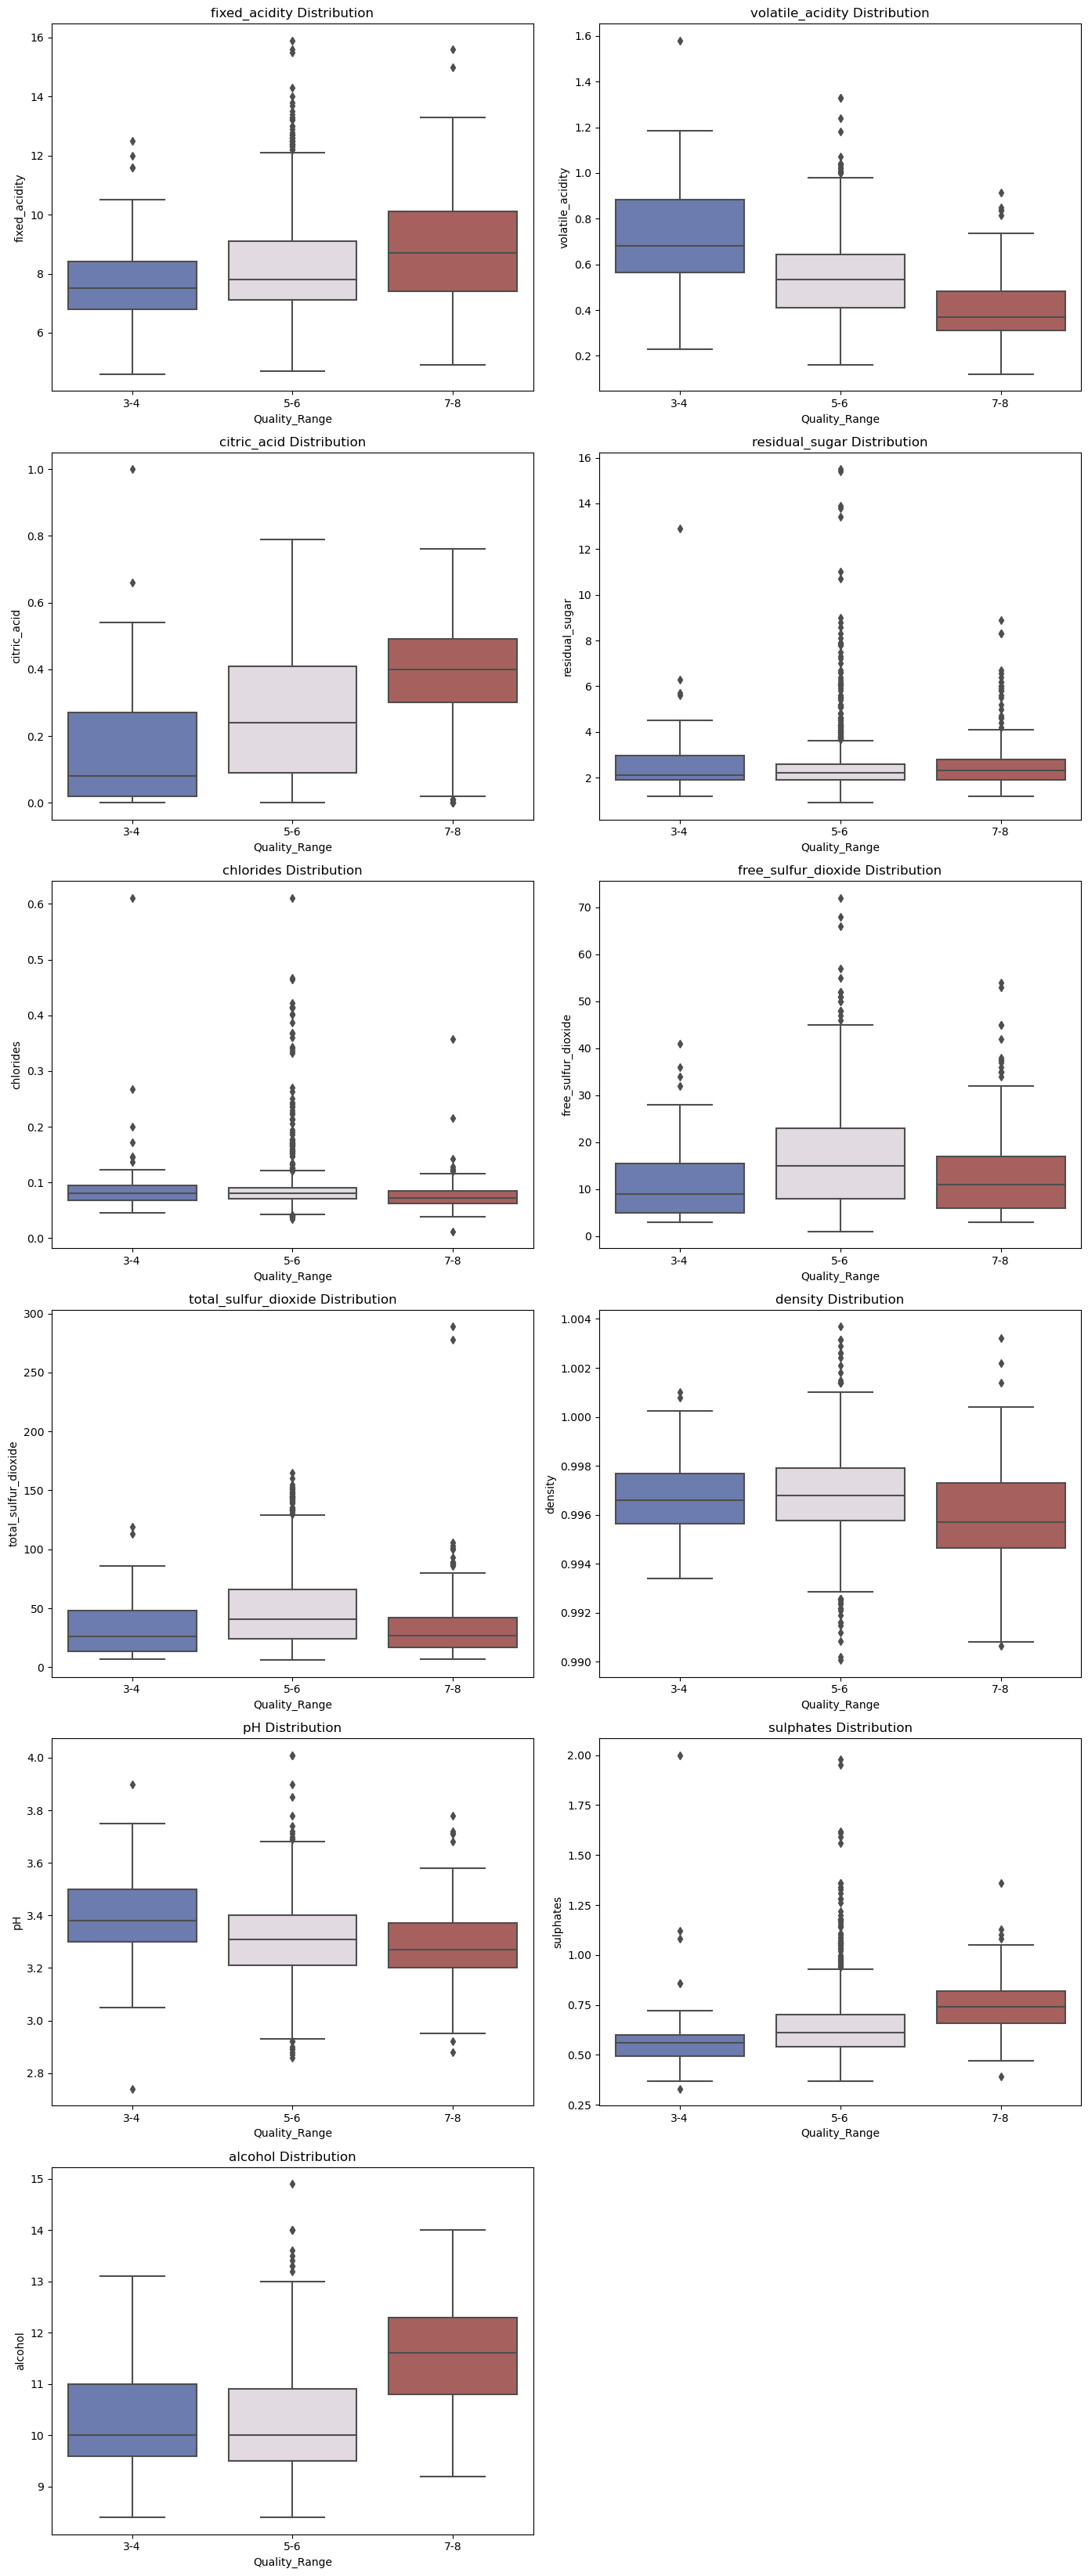

In [21]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="Quality_Range", y=column, data=wine_df,palette="twilight_shifted")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

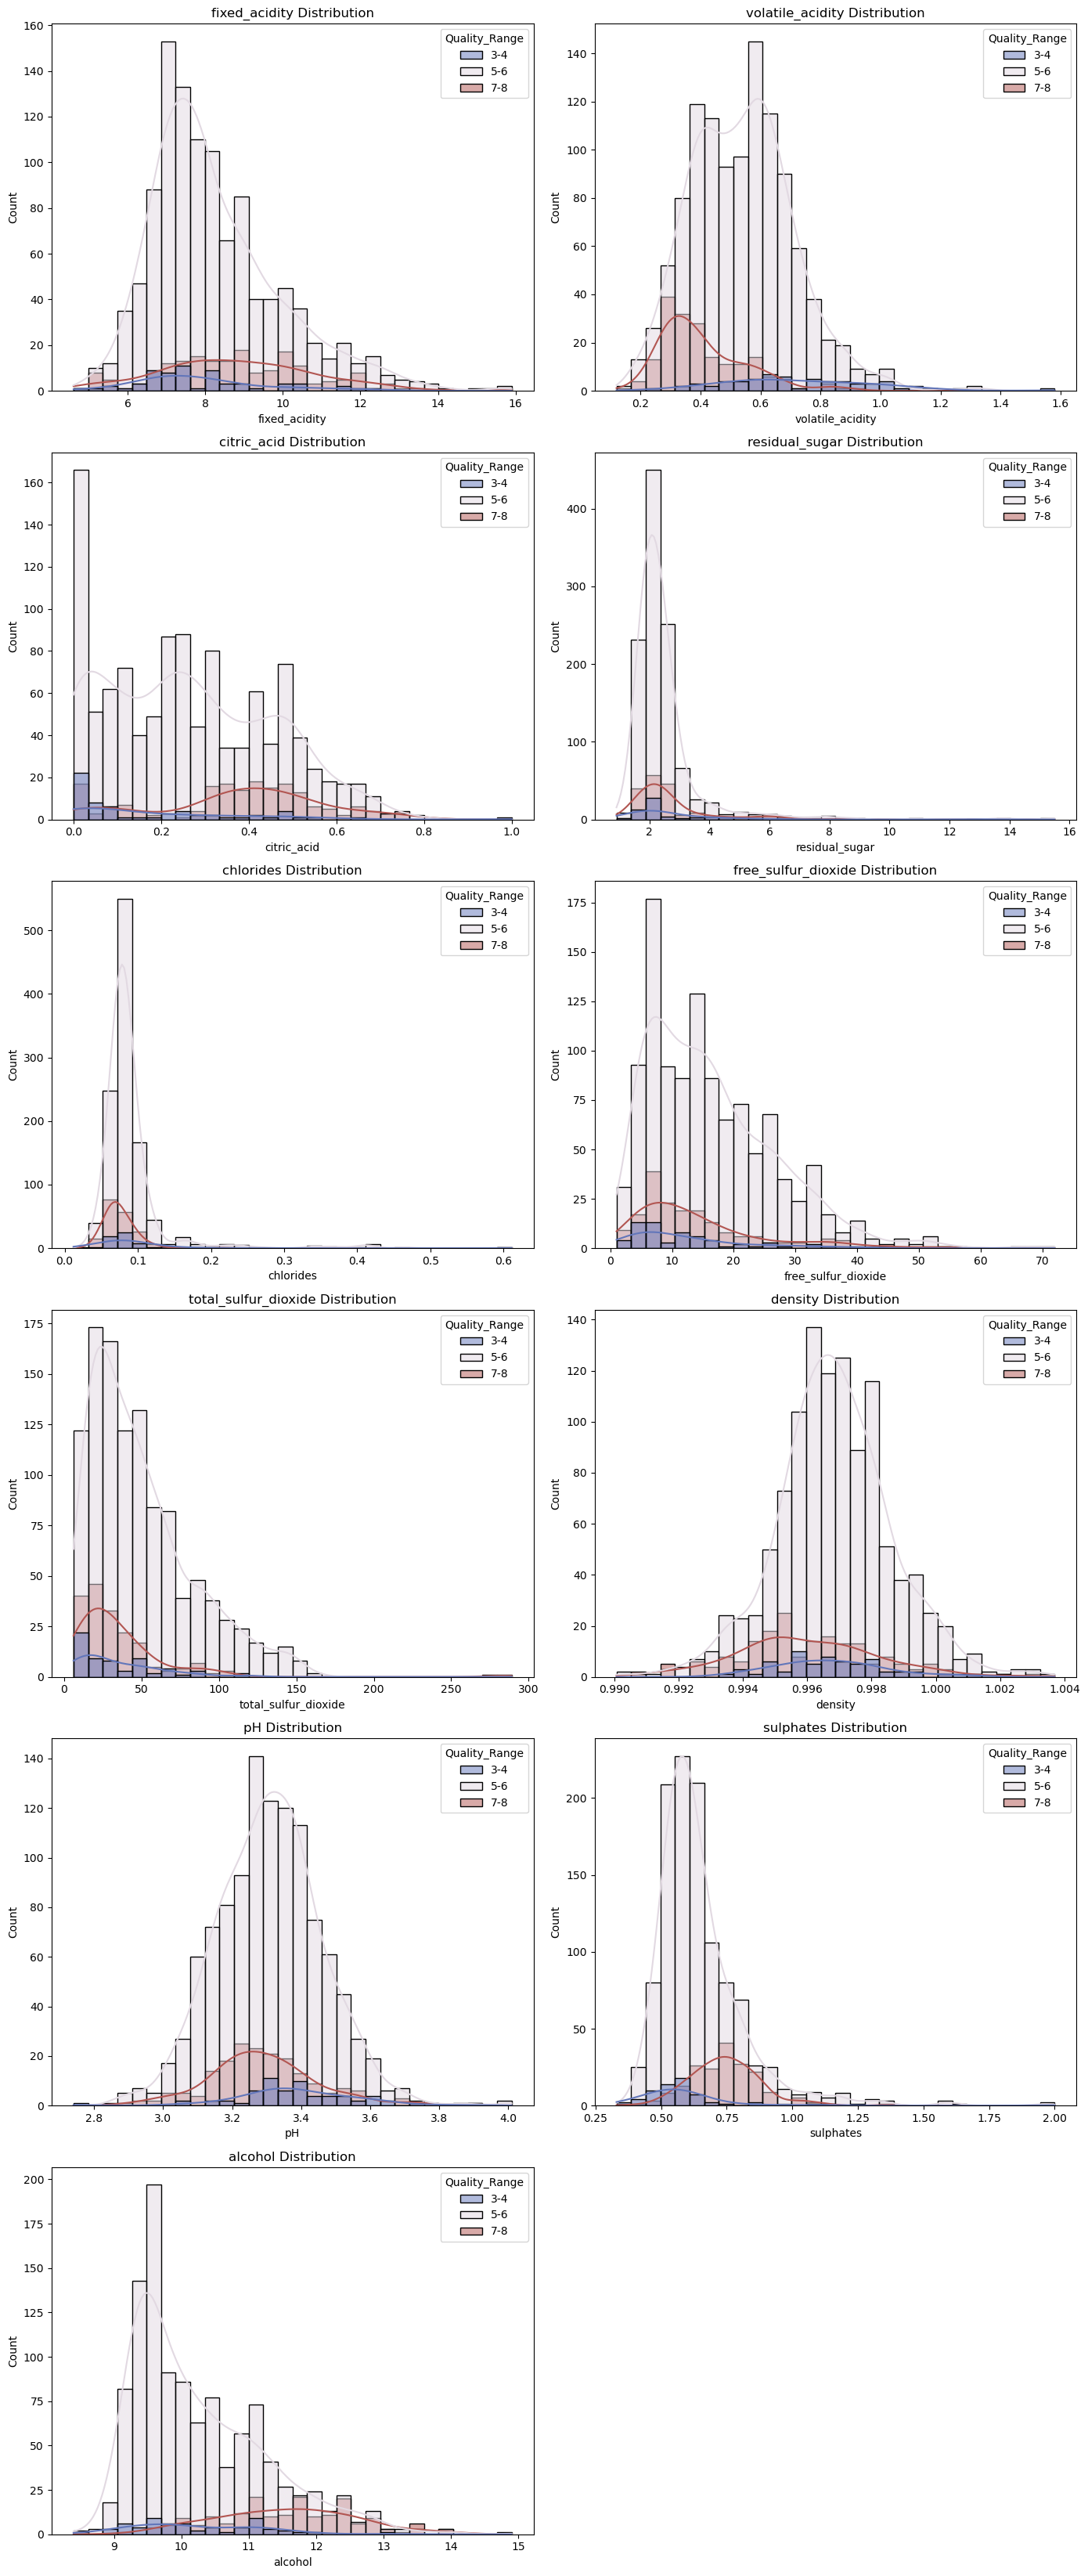

In [22]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="Quality_Range", data=wine_df,bins=30,kde=True, palette="twilight_shifted")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

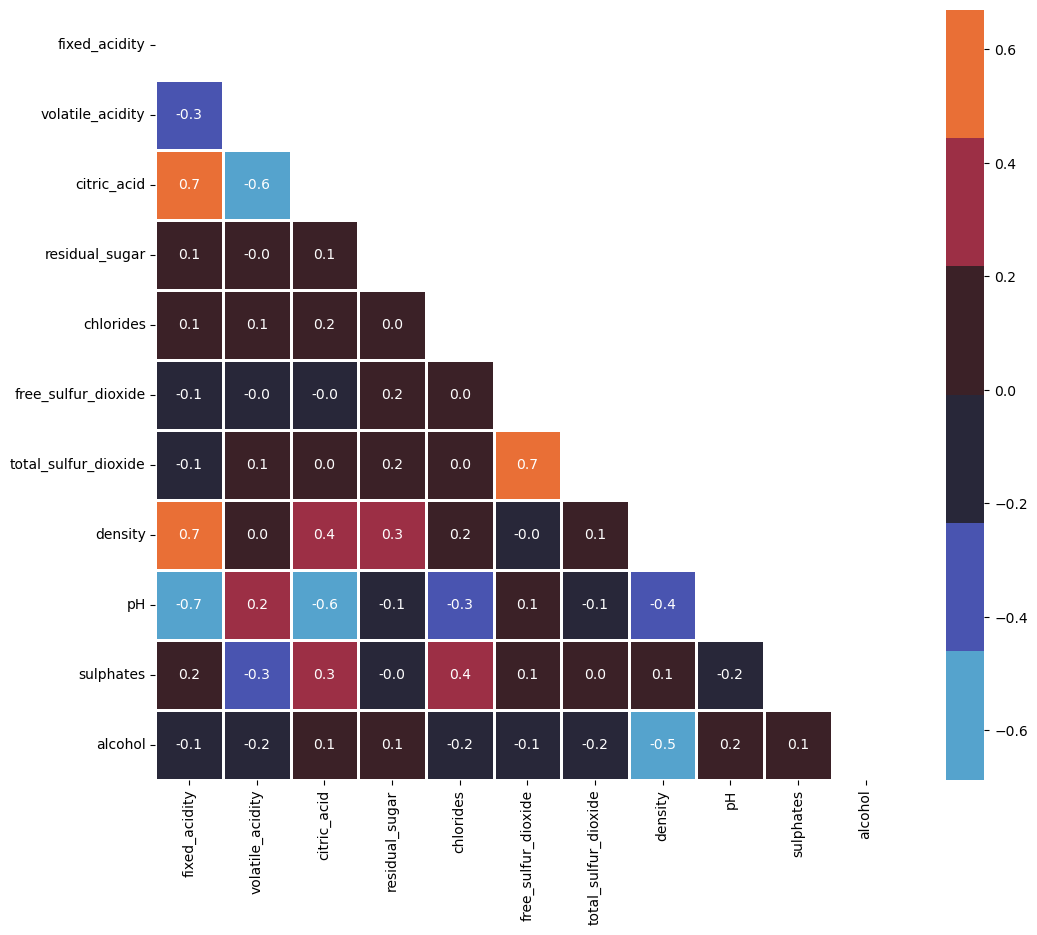

In [28]:
plt.figure(figsize=(12,10))
corr=wine_df[num_cols].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask, cmap=sns.color_palette("icefire"));

In the wine quality prediction analysis, the dataset was explored, cleaned, and visualized. Duplicates were removed, and a new feature, 'Quality_Range,' was created for better visualization. Correlation analysis and outlier detection were performed, revealing insights into feature relationships and distributions. The quality distribution was visualized using pie and count plots. Numerical features with more than 50 unique values were selected for further exploration, showcasing boxplots and histograms based on quality ranges. The correlation heatmap provided a comprehensive view of feature relationships. The analysis lays the foundation for building predictive models and understanding factors influencing wine quality in different ranges.